In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [83]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.519818,0.617163,-9.290760e-07,0.423321,0.572236,-0.040456,0.368203,0.427535,-0.043588,0.361870,...,0.575711,0.323641,-0.021791,0.563246,0.406579,-0.005497,0.557833,0.426345,0.013733,A
1,0.513769,0.522739,-9.160283e-07,0.423178,0.493299,-0.032315,0.365618,0.353651,-0.031731,0.358640,...,0.564834,0.251448,-0.027770,0.557070,0.329217,-0.013233,0.550559,0.353322,0.003703,A
2,0.514800,0.431690,-8.461073e-07,0.426101,0.405104,-0.026980,0.364879,0.273413,-0.024250,0.352319,...,0.557464,0.171576,-0.023549,0.552017,0.248743,-0.008660,0.543126,0.275906,0.008780,A
3,0.499565,0.411572,-8.324783e-07,0.417433,0.402429,-0.032306,0.350113,0.268243,-0.029264,0.335888,...,0.543278,0.160946,-0.024758,0.539876,0.240013,-0.012518,0.533159,0.265413,0.004192,A
4,0.477890,0.492601,-8.842081e-07,0.386279,0.461233,-0.032489,0.326326,0.322483,-0.030091,0.316011,...,0.524737,0.212941,-0.019746,0.516667,0.293005,-0.005011,0.511581,0.319973,0.012990,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,0.398538,0.703151,-3.396313e-07,0.338518,0.629143,-0.020188,0.311857,0.502005,-0.023055,0.360858,...,0.497316,0.461924,-0.033361,0.477356,0.517204,-0.022809,0.472446,0.538934,-0.007727,Z
2595,0.404221,0.708594,-3.609367e-07,0.343501,0.637490,-0.019967,0.315803,0.511464,-0.023003,0.363275,...,0.501852,0.468244,-0.031745,0.481804,0.522818,-0.021065,0.476303,0.544913,-0.006062,Z
2596,0.422955,0.700342,-3.007281e-07,0.361389,0.629597,-0.020228,0.332993,0.504056,-0.023404,0.381079,...,0.516416,0.457275,-0.032746,0.497578,0.510552,-0.022655,0.491859,0.534944,-0.007864,Z
2597,0.452174,0.671040,-2.939209e-07,0.393151,0.604486,-0.024750,0.365191,0.482574,-0.031277,0.415429,...,0.546664,0.441130,-0.038920,0.525984,0.492952,-0.028703,0.518649,0.510331,-0.013191,Z


In [69]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.519818,0.617163,-9.290760e-07,0.423321,0.572236,-0.040456,0.368203,0.427535,-0.043588,0.361870,...,0.575711,0.323641,-0.021791,0.563246,0.406579,-0.005497,0.557833,0.426345,0.013733,A
1,0.513769,0.522739,-9.160283e-07,0.423178,0.493299,-0.032315,0.365618,0.353651,-0.031731,0.358640,...,0.564834,0.251448,-0.027770,0.557070,0.329217,-0.013233,0.550559,0.353322,0.003703,A
2,0.514800,0.431690,-8.461073e-07,0.426101,0.405104,-0.026980,0.364879,0.273413,-0.024250,0.352319,...,0.557464,0.171576,-0.023549,0.552017,0.248743,-0.008660,0.543126,0.275906,0.008780,A
3,0.499565,0.411572,-8.324783e-07,0.417433,0.402429,-0.032306,0.350113,0.268243,-0.029264,0.335888,...,0.543278,0.160946,-0.024758,0.539876,0.240013,-0.012518,0.533159,0.265413,0.004192,A
4,0.477890,0.492601,-8.842081e-07,0.386279,0.461233,-0.032489,0.326326,0.322483,-0.030091,0.316011,...,0.524737,0.212941,-0.019746,0.516667,0.293005,-0.005011,0.511581,0.319973,0.012990,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,0.398538,0.703151,-3.396313e-07,0.338518,0.629143,-0.020188,0.311857,0.502005,-0.023055,0.360858,...,0.497316,0.461924,-0.033361,0.477356,0.517204,-0.022809,0.472446,0.538934,-0.007727,Z
2595,0.404221,0.708594,-3.609367e-07,0.343501,0.637490,-0.019967,0.315803,0.511464,-0.023003,0.363275,...,0.501852,0.468244,-0.031745,0.481804,0.522818,-0.021065,0.476303,0.544913,-0.006062,Z
2596,0.422955,0.700342,-3.007281e-07,0.361389,0.629597,-0.020228,0.332993,0.504056,-0.023404,0.381079,...,0.516416,0.457275,-0.032746,0.497578,0.510552,-0.022655,0.491859,0.534944,-0.007864,Z
2597,0.452174,0.671040,-2.939209e-07,0.393151,0.604486,-0.024750,0.365191,0.482574,-0.031277,0.415429,...,0.546664,0.441130,-0.038920,0.525984,0.492952,-0.028703,0.518649,0.510331,-0.013191,Z


In [70]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)


Features shape = (2599, 63)
Labels shape = (2599,)


In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0,)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)


SVC(C=10, gamma=0.1)

In [72]:
y_pred = svm.predict(x_test)
y_pred

array(['J', 'V', 'Y', 'B', 'L', 'N', 'M', 'C', 'D', 'V', 'F', 'R', 'Y',
       'E', 'F', 'B', 'X', 'O', 'Z', 'Q', 'H', 'K', 'M', 'M', 'H', 'E',
       'C', 'K', 'D', 'V', 'N', 'R', 'D', 'P', 'I', 'H', 'J', 'G', 'R',
       'G', 'R', 'J', 'W', 'N', 'V', 'E', 'E', 'C', 'E', 'M', 'L', 'T',
       'N', 'Z', 'Y', 'P', 'S', 'A', 'P', 'K', 'L', 'P', 'J', 'K', 'O',
       'R', 'Y', 'X', 'F', 'G', 'P', 'V', 'C', 'I', 'P', 'K', 'L', 'O',
       'K', 'C', 'U', 'H', 'S', 'F', 'B', 'I', 'F', 'H', 'I', 'P', 'E',
       'Q', 'T', 'W', 'R', 'I', 'Z', 'J', 'I', 'P', 'E', 'R', 'S', 'K',
       'I', 'O', 'M', 'A', 'Q', 'V', 'I', 'K', 'R', 'P', 'R', 'S', 'L',
       'U', 'Y', 'W', 'M', 'L', 'U', 'U', 'L', 'N', 'T', 'Y', 'L', 'Q',
       'C', 'F', 'D', 'Y', 'T', 'V', 'C', 'H', 'Z', 'J', 'Y', 'A', 'B',
       'H', 'J', 'J', 'O', 'L', 'Y', 'A', 'H', 'P', 'G', 'W', 'S', 'D',
       'W', 'O', 'B', 'F', 'X', 'M', 'N', 'I', 'Q', 'L', 'B', 'G', 'U',
       'Y', 'Q', 'H', 'X', 'S', 'O', 'P', 'H', 'W', 'G', 'F', 'U

In [73]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
print ("f1:",f1)
print ("recall:",recall)
print ("precision:",precision)


f1: 0.9923076923076923
recall: 0.9923076923076923
precision: 0.9923076923076923


In [74]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9923076923076923


In [75]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [76]:
model = SVC(C=10, gamma=0.1, kernel='rbf')
model.fit(X, y)

SVC(C=10, gamma=0.1)

In [77]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [78]:
color_map = plt.cm.get_cmap('Paired')


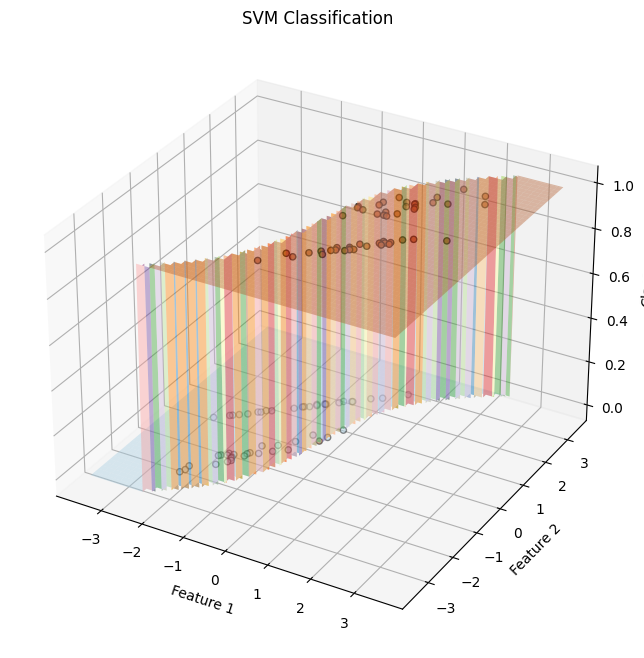

In [79]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx, yy, Z, cmap=color_map, alpha=0.4)
ax.scatter(X[:, 0], X[:, 1], model.predict(X), c=y, edgecolors='k', cmap=color_map)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Class')
ax.set_title('SVM Classification')

plt.show()

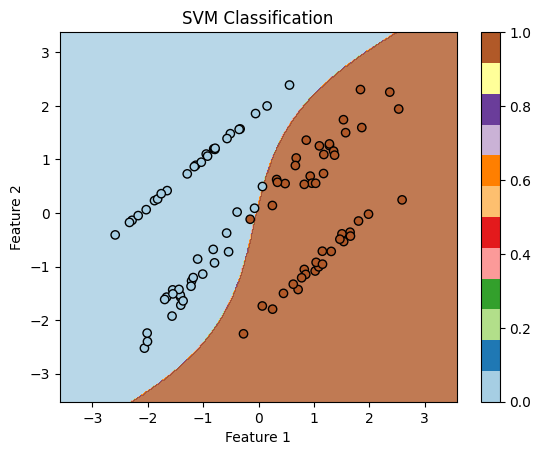

In [80]:
plt.contourf(xx, yy, Z, alpha=0.8, cmap=color_map)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=color_map)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification')
plt.colorbar()
plt.show()

<AxesSubplot: title={'center': 'Confusion Matrix - Hand Language'}>

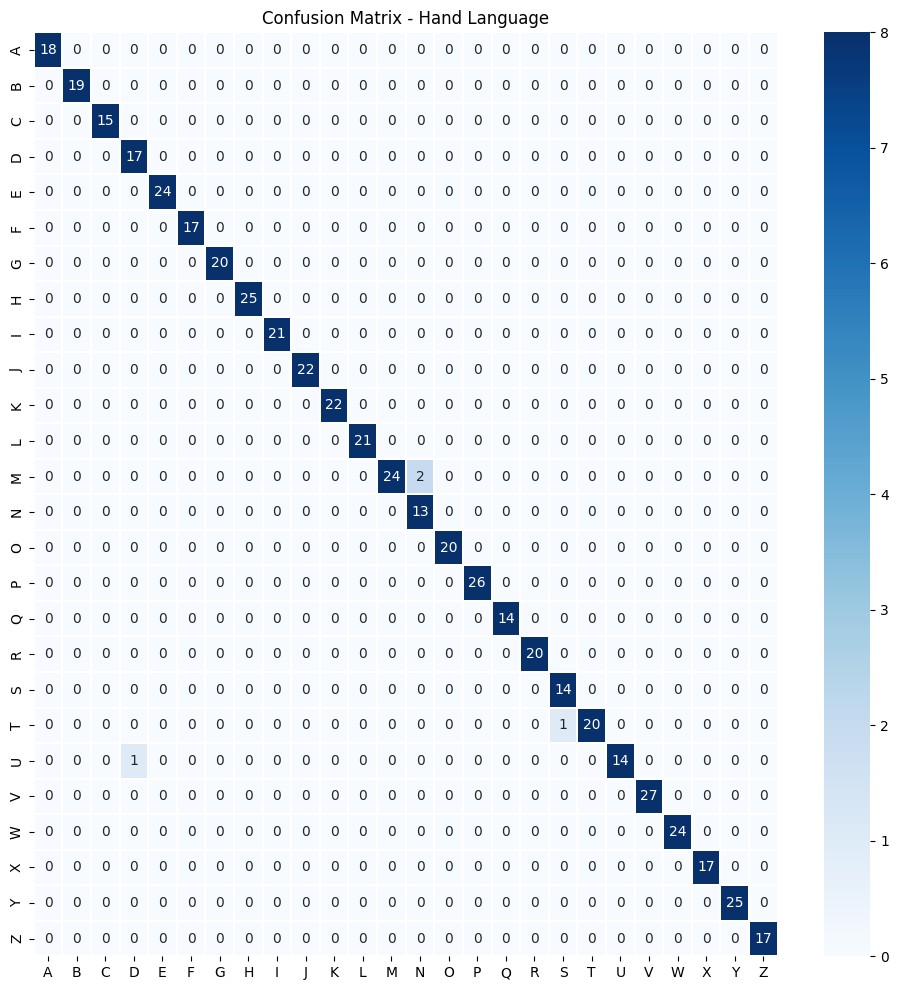

In [81]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - Hand Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [82]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)